In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import corner
import sncosmo

In [2]:
source = sncosmo.MLCS2k2Source()

In [3]:
source.set(delta = 0.2)
phase = [-3.2]
wave = np.linspace(3000., 9000., 5000.)

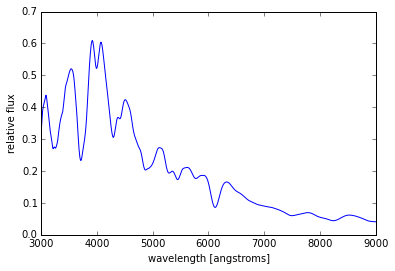

In [4]:
plt.figure()
plt.plot(wave,source.flux(phase,wave).reshape(len(wave)))
plt.xlabel('wavelength [angstroms]')
plt.ylabel('relative flux');

In [5]:
dust = sncosmo.CCM89Dust()
model = sncosmo.Model(source=source, effects=[dust],
                     effect_names=['host'], effect_frames=['rest'])

In [6]:
model.set(hostr_v=2.5)
print(model)

source:
  class      : MLCS2k2Source
  name       : None
  version    : None
  phases     : [-20, .., 85] days
  wavelengths: [1000, .., 25000] Angstroms
effect (name='host' frame='rest'):
  class           : CCM89Dust
  wavelength range: [909.09, 33333.3] Angstroms
parameters:
  z         = 0.0
  t0        = 0.0
  amplitude = 1.0
  delta     = 0.20000000000000001
  hostebv   = 0.0
  hostr_v   = 2.5


In [7]:
model.bandmag('bessellv', 'vega', 0.)

-19.489265331829696

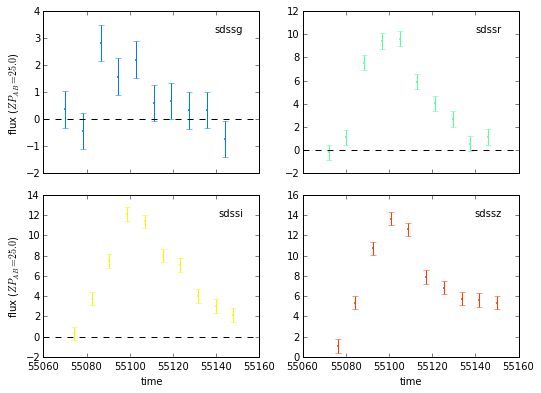

In [8]:
data = sncosmo.load_example_data()
sncosmo.plot_lc(data);

In [9]:
model.set(z=0.5)
fitparams = ['t0', 'amplitude', 'delta', 'hostebv']
res, fitted_model = sncosmo.fit_lc(data, model, fitparams, bounds={'delta': (-0.5, 1.8)})

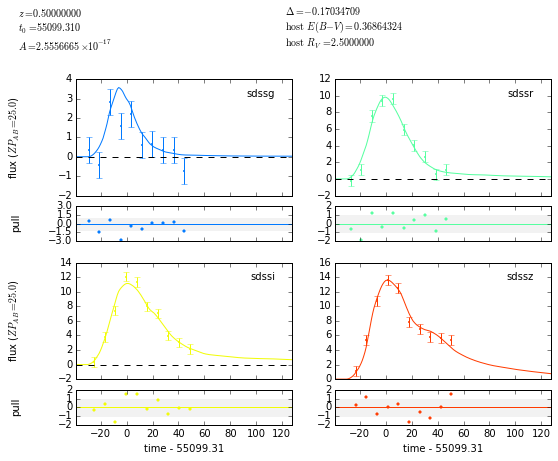

In [10]:
sncosmo.plot_lc(data, fitted_model);

In [ ]:
res, fitted_model = sncosmo.mcmc_lc(data, model, fitparams, bounds={'delta': (-0.5, 1.8)}, nburn=500, nwalkers=20)

In [ ]:
sncosmo.plot_lc(data, fitted_model);

In [ ]:
corner.corner(res.samples,labels=fitparams);